In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, lil_matrix,identity
import seaborn

In [2]:
def houses_check(x,y):
    
    first_type_houses = [(69,12),(69,165),(192,12),(192,165)]
    second_type_houses = [(138,51),(138,204),(261,51),(261,204)]
    third_type_houses = [(69,111),(69,264),(138,12),(138,165),(192,111),(192,264),(261,12),(261,165)]

    for house in first_type_houses:
        if house[0] < x and x < house[0]+18 and house[1] < y and y < house[1]+78:
            return True
        new_house_0 = house[0]+12 # because of tuple
        result = (new_house_0 < x and x < new_house_0+12 and house[1] < y and y < house[1]+18)
        if result == True:
            return result
        
    for house in second_type_houses:
        if house[0] < x and x < house[0]+18 and house[1] < y and y < house[1]+78:
            return True
        
        new_house_0 = house[0]-12
        new_house_1 = house[1]+60
        
        result = (new_house_0 < x and x < new_house_0+13 and new_house_1 < y and y < new_house_1+18)
        
        if result == True:
            return result
        
    for box in third_type_houses:
        if (box[0] < x and x < box[0]+18 and box[1] < y and y < box[1]+18):
            return True
        
    return False

In [3]:
def edge_condition_check(x,y):
    
    if houses_check(x,y): 
        return True
    
    if x>299 or y>299 or y == 0: 
        return True

    return False

def run(epsilon):
    
    k, lambda1, lambda2, n = 0.5, 1.0, 0.0, 300
    h = 1 / n
    tau = (h**2)/(4*k)
    u0, N= 1-4*(tau*k)/(h**2), n * n
    x = np.zeros((N, 1))
    for i in range(n):
        x[n*i,0]=1
    A, b = lil_matrix((N, N)), np.zeros(N)
    dx, dy = [1, -1, 0, 0],[0, 0, 1, -1]
    coeffs = [tau*(k/(h**2)-lambda1/(2*h)),
             tau*(k/(h**2)+lambda1/(2*h)),
             tau*(k/(h**2)-lambda2/(2*h)),
             tau*(k/(h**2)+lambda2/(2*h))]

    for i in range(0, n): 
        for e in range(0, n):
            ind = i * n + e
            A[ind,ind] = u0
            for j in range(0, 4):
                x1, y1, coeff = i + dx[j], e + dy[j], coeffs[j]
                if x1==0:
                    b[ind] = coeff  
                elif edge_condition_check(x1,y1):
                    A[ind,ind] += coeff
                else:
                    A[ind,x1*300+y1] = coeff

    A, b = csr_matrix(A),b.reshape(N, -1)
    
    while(True):
        new_x = (A * x + b)
        error = np.linalg.norm(new_x - x) / max(1, np.linalg.norm(x))
        if error < epsilon:
            break
        x = new_x
        
    return x.reshape((n,n)).T

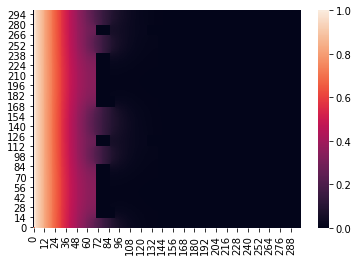

In [16]:
e = 1e-4
x_res = run(e)
res = seaborn.heatmap(x_res)
res.invert_yaxis()

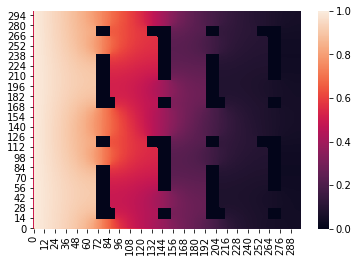

In [4]:
e = 1e-5
x_res = run(e)
res = seaborn.heatmap(x_res)
res.invert_yaxis()

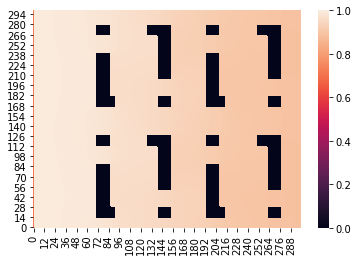

In [6]:
e = 1e-6
x_res = run(e)
res = seaborn.heatmap(x_res)
res.invert_yaxis()